In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [36]:
X,y = make_blobs(n_features=2,centers=2,random_state=42)

In [37]:
X.shape,y.shape

((100, 2), (100,))

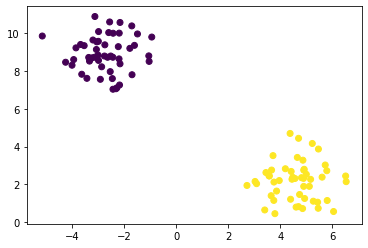

In [38]:
plt.scatter(X[:,0],X[:,1],c=y)

In [39]:
class customLogistic:
    
    def __init__(self,lr=0.01,iters=10):
        
        self.lr = lr
        self.iters = iters
        
    def fit(self,X,y):
        ones = np.ones([X.shape[0],1])
        X = np.hstack([ones,X])
        self.theta_ = np.random.randn(X.shape[1],1)
        errors = []
        for i in range(self.iters):
            errors.append(self.gradient_descent(X,y))
            
        return errors
    
    def gradient_descent(self,X,y):
        delta_theta,errors = self.gradient(X,y)
        
        self.theta_ += delta_theta
        return errors
    
    def gradient(self,X,y):
        yh = self.hypo(X)
        ya = y.reshape(-1,1)
        
        dlldm = np.dot(X.T,(yh-ya))/len(X)
        
        error = -np.mean((ya * np.log(yh)) + ((1-ya)*(np.log(1-yh))))
        return -dlldm * self.lr , error
    
    def hypo(self,X):
        g = np.dot(X,self.theta_)
        return 1/(1+np.exp(-g))
    
    def predict(self,X):
        ones = np.ones([X.shape[0], 1])
        X = np.hstack([ones, X])
        result = self.hypo(X)
        return (result.flatten()>.5).astype(int)

In [40]:
model = customLogistic(iters=1000)

In [41]:
errors = model.fit(X,y)

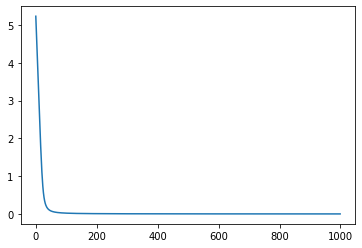

In [42]:
plt.plot(errors)

In [44]:
model.predict(X)

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [45]:
y

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])